In [1]:
# 导入数据分析常用库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 导入数据
heart = pd.read_csv('UCI Heart Disease Dataset.csv')
# 查看一下数据
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [4]:
# 查看一下heart数据集的基本信息
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


3.1 特征之间的相关关系

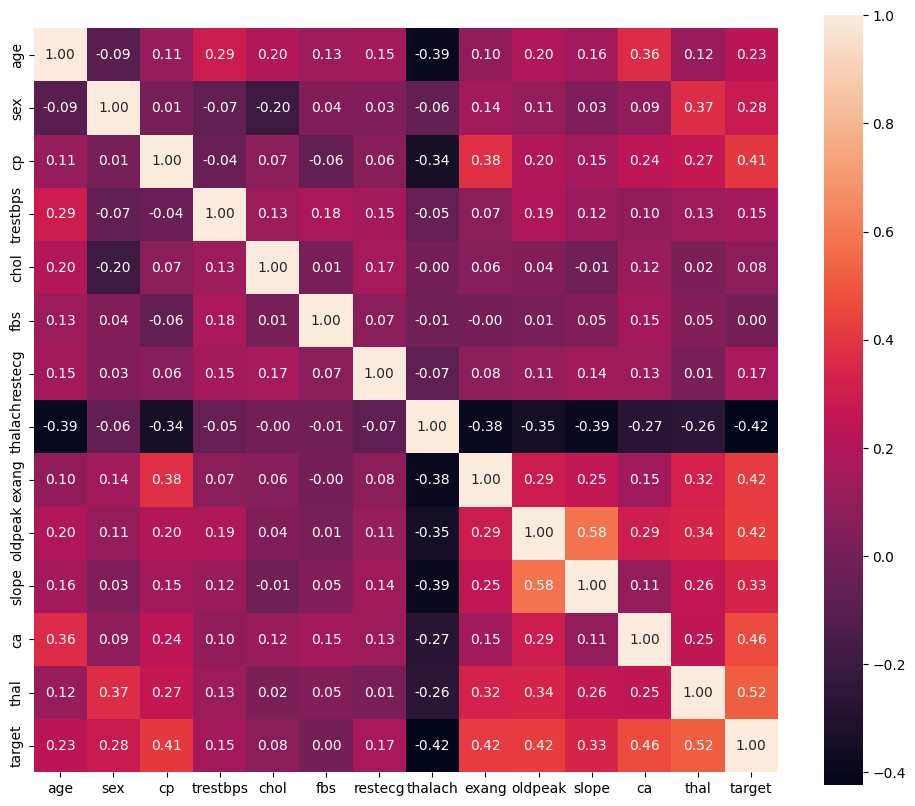

In [5]:
# 查看不同特征之间的相关关系
plt.figure(figsize=(12,10))
corr =  heart.corr()
sns.heatmap(data=corr,annot=True, square=True,fmt='.2f')
plt.show()

结果显示：

1.心脏病和cp（心绞痛类型），thalach（最大心率），exang（运动引起的心绞痛），oldpeak（ST段抑制）几个特征之间有较强的相关性，相关系数超过0.4
2.心脏病和age（年龄），sex（性别），slope（运动高峰的心电图），ca（主要血管数），thal（地中海贫血的血液疾病）几个特征存在一定的相关性
3.心脏病和chol（胆固醇），fbs（空腹血糖）之间的相关性较弱

In [11]:
import matplotlib.pyplot as plt  
from matplotlib import font_manager  
  
# 设置matplotlib字体为支持中文的字体，例如“SimHei”  
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为SimHei  
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号 

3.2 从整体看下心脏病患病情况

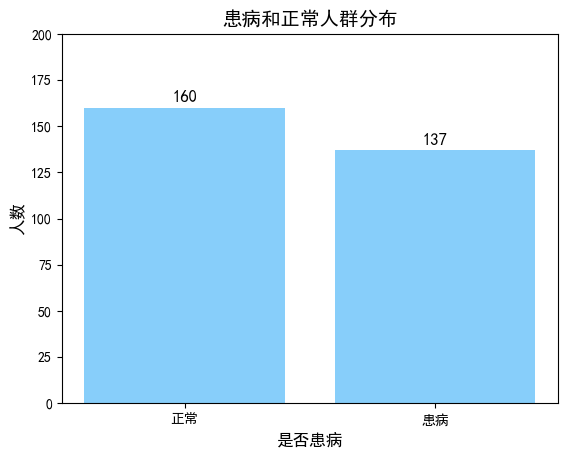

In [12]:
#  1.1 数据集中患病率和非患病率的情况
colors=['tomato','lightskyblue']

countNoDisease = len(heart[heart['target']==0])
countHaveDisease = len(heart[heart['target']==1])
total =  len(heart['target'])
rateNo =  countNoDisease/total*100
rateHave = countHaveDisease/total*100
diseaseRate =  pd.Series({'正常':countNoDisease, '患病': countHaveDisease})

# 绘图
plt.bar(diseaseRate.index,diseaseRate.values,color='lightskyblue')
plt.title('患病和正常人群分布',fontsize=14)
plt.xlabel('是否患病',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.ylim([0,200])

# 添加数据标签
for a, b in zip(diseaseRate.index, diseaseRate.values):  
    plt.text(a, b + 3, str(b), ha='center', fontsize=12)
plt.show()

3.3 研究心脏病和年龄之间的关系

In [24]:
# 定义一个DataFrame接收分割后的年龄
age_distDf = pd.DataFrame()

# 用pd.cut() 将年龄进行分割
age_distDf['age_range']  = pd.cut(x = heart['age'],
                                  bins = [0,18,40,60,100],
                                  include_lowest = True,right=False,
                                  labels = ['儿童','青年','中年','老年'])

# 将原数据集的target合并到age_distDf中
age_distDf = pd.concat([age_distDf['age_range'],heart['target']],axis=1)
age_distDf.head()

,age_range,target
0,老年,0
1,老年,1
2,老年,1
3,青年,0
4,中年,0


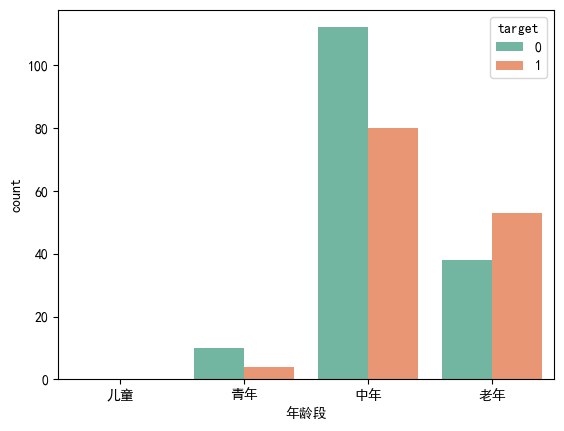

In [14]:
# 画柱状图，观察不同年龄段的人患心脏病的情况
sns.countplot(data=age_distDf,x='age_range',hue='target',palette='Set2')
plt.xlabel('年龄段')
plt.show()

结果显示：这个数据集的人群集中在中年这个年龄段，且中年人患病的较多

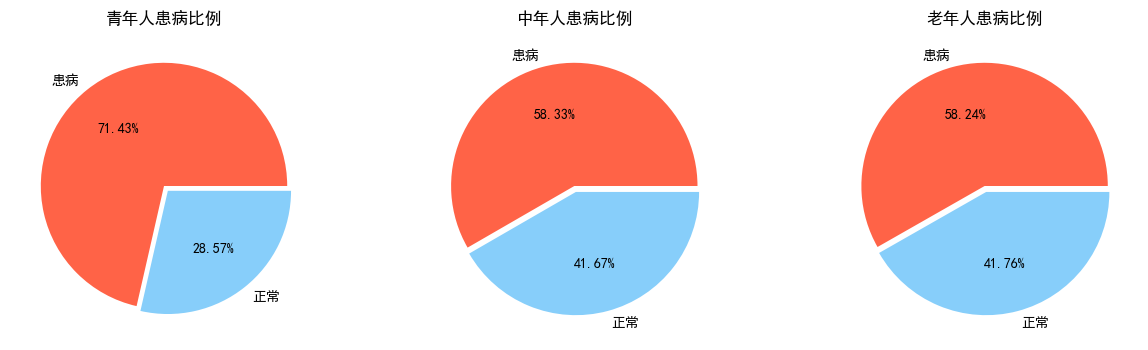

In [15]:
# 绘制饼图比较不同年龄段人群患病情况
plt.figure(figsize = (3*5,1*4))

# 青年人患病比例
ax1 = plt.subplot(1,3,1)
youth =  age_distDf[age_distDf['age_range']=='青年']['target'].value_counts()
plt.pie(youth,explode=[0,0.05],autopct='%.2f%%',labels=['患病','正常'],colors=colors)
plt.title('青年人患病比例')

# 中年人患病比例
ax2 =  plt.subplot(1,3,2)
middle = age_distDf[age_distDf['age_range']=='中年']['target'].value_counts()
plt.pie(middle,explode=(0,0.05),autopct='%.2f%%',labels=['患病','正常'],colors=colors)
plt.title('中年人患病比例')

# 老年人患病比例
ax2 = plt.subplot(1,3,3)
old =  age_distDf[age_distDf['age_range']=='老年']['target'].value_counts()
plt.pie(old,explode=[0,0.05],autopct='%.2f%%',labels=['患病','正常'],colors=colors)
plt.title('老年人患病比例')
plt.show()

3.4 心脏病和性别之间的关系

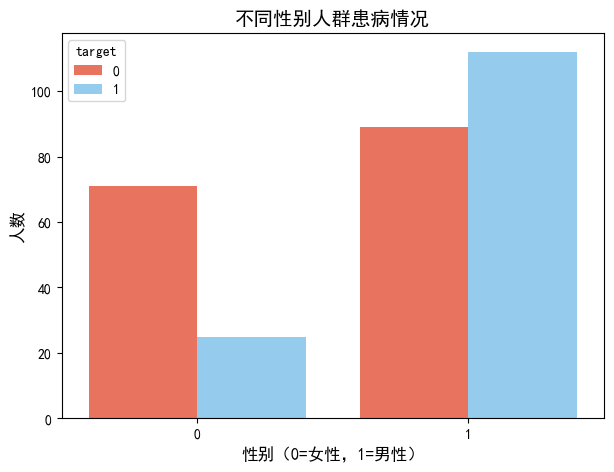

In [18]:
sexDf = heart[['sex','target']]
plt.figure(figsize=(7,5))
sns.countplot(data = sexDf,x = 'sex',hue='target',palette=colors)
plt.title('不同性别人群患病情况',fontsize=14)
plt.xlabel('性别（0=女性，1=男性）',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.show()

结果显示：女性患心脏病的比例高于男性

3.5 心脏病和cp（心绞痛类型）之间的关系

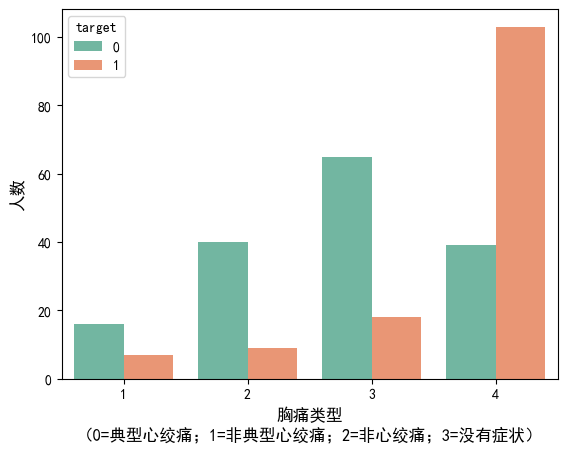

In [19]:
cpDf = heart[['cp','target']]
sns.countplot(data = cpDf,x ='cp',hue='target',palette='Set2')
plt.xlabel('胸痛类型\n（0=典型心绞痛；1=非典型心绞痛；2=非心绞痛；3=没有症状）',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.show()

结果显示：典型性心绞痛患者得心脏病的概率比较低，只是单纯的心绞痛，并非心脏病，而其他1~3类心绞痛患者得心脏病的几率比价高，说明心脏病和心绞痛类型存在一定的关系。

3.6 心脏病和最大心率（thalach）之间的关系

In [20]:
# 心率和年龄也有一定的关系，可以结合考察心脏病，心率，年龄
thaDf = heart[['thalach','target']]
thaDf['age_range'] = pd.cut(heart['age'],bins=[0,18,40,60,100],
                           labels=['儿童','青年','中年','老年'],
                            include_lowest=True,right=False)
thaDf.head()

C:\Users\24879\AppData\Local\Temp\ipykernel_6268\643145925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thaDf['age_range'] = pd.cut(heart['age'],bins=[0,18,40,60,100],


,thalach,target,age_range
0,150,0,老年
1,108,1,老年
2,129,1,老年
3,187,0,青年
4,172,0,中年


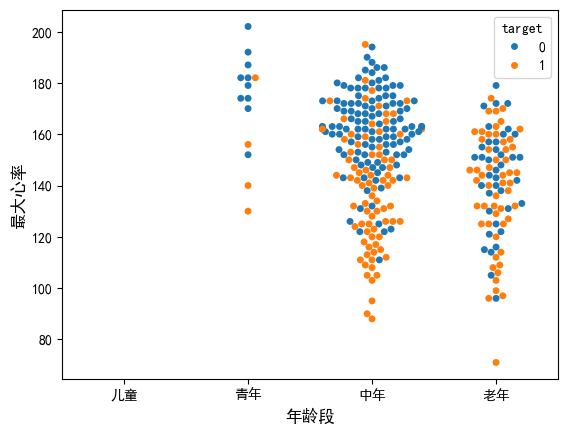

In [21]:
sns.swarmplot(data =thaDf, x='age_range',y='thalach', hue='target')
plt.xlabel('年龄段', fontsize=12)
plt.ylabel('最大心率',fontsize=12)
plt.show()

结果显示：
随着年龄的增加，最大心率逐渐降低。
同一个年龄段中，心脏病人群的心率普遍高于正常人。

3.7 运动引起的心绞痛（exang）和心脏病之间的关系。

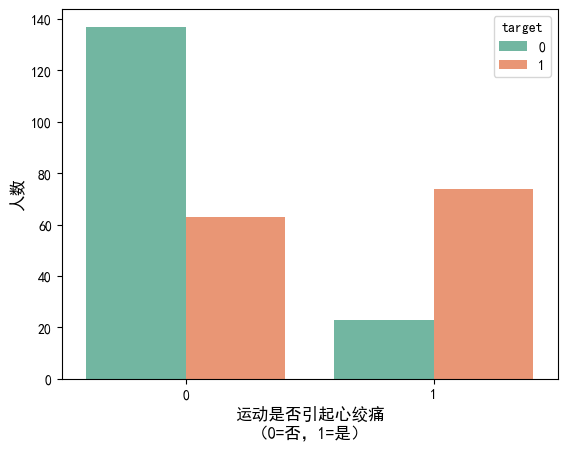

In [22]:
exangDf =  heart[['exang','target']]
sns.countplot(data=exangDf,x='exang',hue='target',palette='Set2')
plt.xlabel('运动是否引起心绞痛\n（0=否，1=是）',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.show()

结果显示：运动引起的心绞痛诊断为心脏病的概率比较低。所以只是运动是有心绞痛的现象，首先考虑可能是其他疾病，但是如果本身有心脏病，要听从医嘱静养，高强度的运动还是会引起心绞痛的。

3.8 静息血压和心脏病的关系

In [26]:
trebpsDf = heart[['trestbps','target']]
sns.boxplot(trebpsDf['target'],trebpsDf['trestbps'])
plt.xlabel('是否患心脏病（0=否，1=是）',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.title('心脏病与静息血压的关系')
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

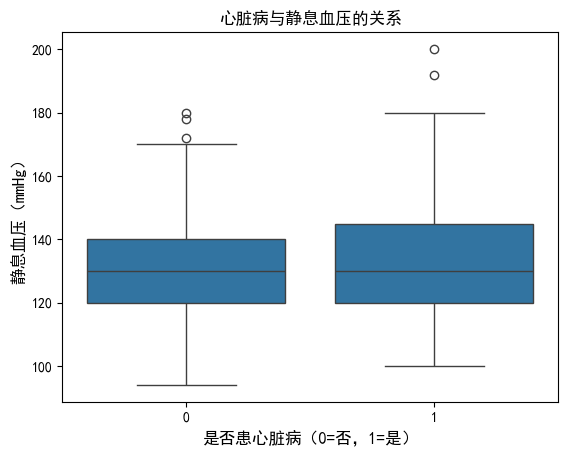

In [27]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 假设 heart 是已经加载好的 DataFrame  
trebpsDf = heart[['trestbps', 'target']]  
  
# 使用关键字参数 x 和 y 来指定分类变量和连续变量  
sns.boxplot(x=trebpsDf['target'], y=trebpsDf['trestbps'])  
plt.xlabel('是否患心脏病（0=否，1=是）', fontsize=12)  
plt.ylabel('静息血压（mmHg）', fontsize=12)  # 注意这里也更正了y轴标签  
plt.title('心脏病与静息血压的关系')  
plt.show()

结果显示：正常人的静息血压稍高于心脏病患者

4.1.1 非连续性分类数据处理（cp，restecg，slope，thal）

In [28]:
# 采用get_dummies()编码方式处理非连续性分类数据

cp_dummies= pd.get_dummies(heart['cp'],prefix = 'cp')
restecg_dummies =  pd.get_dummies(heart['restecg'],prefix='restecg')
slope_dummies =  pd.get_dummies(heart['slope'],prefix='slope')
thal_dummies = pd.get_dummies(heart['thal'],prefix='thal')

# 将原数据中经过独热编码的列删除
heart_new =  heart.drop(['cp','restecg','slope','thal'],axis=1)
heart_new = pd.concat([heart_new,cp_dummies,restecg_dummies,slope_dummies,thal_dummies],axis=1)
heart_new.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_0,thal_1,thal_2
0,63,1,145,233,1,150,0,2.3,0,0,...,False,False,False,True,False,False,True,False,True,False
1,67,1,160,286,0,108,1,1.5,3,1,...,True,False,False,True,False,True,False,True,False,False
2,67,1,120,229,0,129,1,2.6,2,1,...,True,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,False,False,True,True,False,False
4,41,0,130,204,0,172,0,1.4,0,0,...,False,False,False,True,True,False,False,True,False,False


4.1.2 拆分数据集和目标集

In [29]:
# 分离出数据和标签
label =  heart_new['target']
data =  heart_new.drop('target',axis=1)
data.shape
(303, 23)

# 数据集合的不同特征之间数据相差有点大，对于SVM、KNN等算法，会产生权重影响，因此需要归一化处理数据
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(data)
data =  standardScaler.transform(data)

# 拆分训练集，测试集
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(data,label,random_state=3)
train_X.shape
(227, 23)

# 这是一个很显著的二分类问题，首先想到的模型就是经典的逻辑回归

(227, 23)

4.2 机器学习
【逻辑回归模型】
（1）使用默认参数构建模型

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()

# 训练模型
log_reg .fit(train_X,train_y)

# 预测数据
log_pred_y = log_reg.predict(test_X)

# 评估模型
log_reg.score(train_X,train_y)
0.85462555066079293

log_reg.score(test_X,test_y)
0.88157894736842102

# 导入评价指标，分类准确率
from sklearn.metrics import accuracy_score
accuracy_score(test_y,log_pred_y)
0.88157894736842102

0.881578947368421

（2）使用网格搜索寻找更好的模型参数

In [32]:
# 逻辑回归参数详细解读可以参考 https://blog.csdn.net/jark_/article/details/78342644
# 导入网格搜索
from sklearn.model_selection import GridSearchCV
param_test =  {'penalty':['l2','l1'],
                'C':[0.01,0.1,1.0,10,100],
                'class_weight':[None,'balanced']}
log_gv =  GridSearchCV(estimator=log_reg,param_grid=param_test,cv=5)
log_gv.fit(train_X,train_y)

# 最优模型参数
log_gv.best_params_
{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

# 最优模型得分
log_gv.score(train_X,train_y)
0.8590308370044053

log_gv.score(test_X,test_y)
0.86842105263157898

# 预测数据
log_pred_y =  log_gv.predict(test_X)

# 查看主要分类指标文本报告
from sklearn.metrics import classification_report

print(classification_report(test_y,log_pred_y))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.83      0.81      0.82        36

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solve

【KNN近邻法】
（1）使用默认参数

In [34]:
# 构建模型
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()

#训练数据
knn.fit(train_X,train_y)

# 预测数据
knn_pred_y = knn.predict(test_X)

# 评估模型
knn.score(train_X,train_y)
0.8722466960352423

knn.score(test_X,test_y)
0.86842105263157898

accuracy_score(test_y,knn_pred_y)

0.8533333333333334

（2）使用网格搜索寻找更好的模型参数

In [35]:
from sklearn.model_selection import GridSearchCV
knn =  KNeighborsClassifier()
param_test =  [
    {'n_neighbors':[i for i in range(1,31)],
    'weights':['uniform']},

    {'n_neighbors':[i for i in range(1,21)],
    'weights':['distance'],
    'p':[i for i in range(1,6)]}
]
knn_gv = GridSearchCV(estimator = knn,param_grid=param_test,cv=5)
knn_gv.fit(train_X,train_y)

# 最优参数
knn_gv.best_params_
{'n_neighbors': 13, 'p': 4, 'weights': 'distance'}

# 预测数据
knn_pred_y = knn_gv.predict(test_X)

# 查看主要分类指标文本报告
print(classification_report(test_y,knn_pred_y))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.83      0.81      0.82        36

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



【Decision Tree模型】
（1）使用默认参数

In [36]:
# 构建模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

# 训练数据
tree.fit(train_X,train_y)

# 预测数据
pred_y = tree.predict(test_X)

# 评估模型
accuracy_score(test_y,pred_y)
0.76315789473684215

tree.score(train_X,train_y)
1.0

tree.score(test_X,test_y)

0.76

（2）使用网格搜索寻找更好的参数

In [37]:
param_test={'max_features':['auto','sqrt','log2'],
            'min_samples_split':list(range(2,20)),
            'min_samples_leaf':list(range(1,12))

}
tree_gv = GridSearchCV(estimator=tree,param_grid=param_test,cv=5)
tree_gv.fit(train_X,train_y)

# 最优参数
tree_gv.best_params_
{'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 12}

# 预测数据
pred_y = tree_gv.predict(test_X)

# 查看主要分类指标文本报告
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.76      0.72      0.74        36

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
990 fits failed out of a total of 2970.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
990 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\Anaconda3\envs\pytorch\Lib\site-

将上述三种模型的混淆矩阵和ROC曲线分别绘制在一个画板内进行比较

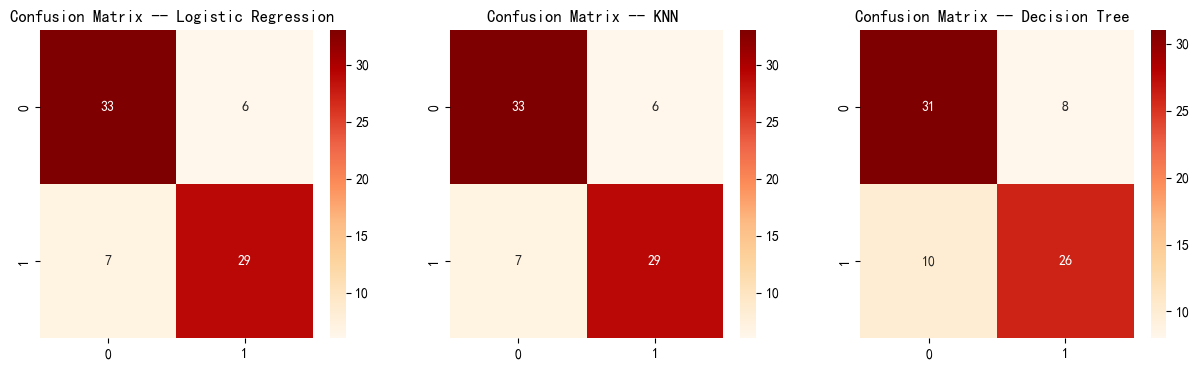

In [39]:
from sklearn.metrics import confusion_matrix

# 绘制逻辑回归，KNN和决策树的混淆矩阵
i=1
fig1= plt.figure(figsize=(3*5,1*4))

estimator_dict={'Logistic Regression':log_gv,'KNN':knn_gv,'Decision Tree':tree_gv}
for key,estimator in estimator_dict.items():
    # 绘制混淆矩阵
    pred_y =  estimator.predict(test_X)
    matrix = pd.DataFrame(confusion_matrix(test_y,pred_y))
    ax1 = fig1.add_subplot(1,3,i)
    sns.heatmap(matrix,annot=True,cmap='OrRd')
    plt.title('Confusion Matrix -- %s ' % key)
    i+=1
plt.show()

结果显示：三种模型中，逻辑回归的真阳率最高，KNN其次，决策树最低。

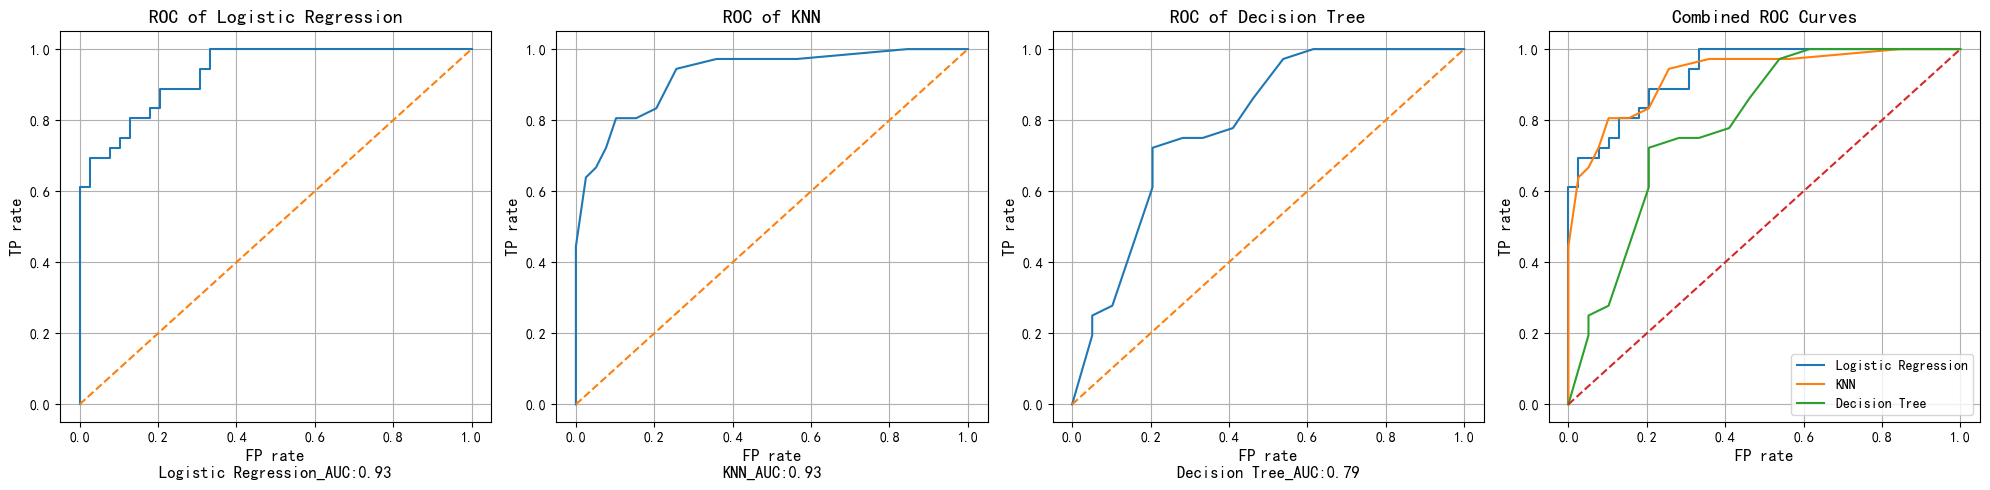

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#绘制逻辑回归，KNN和决策树的ROC 曲线并计算AUC 面积  
log_score = log_gv.decision_function(test_X)  
knn_score = knn_gv.predict_proba(test_X)[:, 1]  
tree_score = tree_gv.predict_proba(test_X)[:, 1]  
scores = [log_score, knn_score, tree_score]  
estimator_labels = ['Logistic Regression', 'KNN', 'Decision Tree']  
  
fig2, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))  
  
for i, (score, label, ax) in enumerate(zip(scores, estimator_labels, axs[:-1])):  
    fprs, tprs, thresholds = roc_curve(test_y, score)  
    ax.plot(fprs, tprs)  
    ax.plot([0, 1], [0, 1], linestyle='--')  
    auc = roc_auc_score(test_y, score)  
    ax.set_xlabel(f'FP rate\n{label}_AUC:{auc:.2f}', fontsize=12)  
    ax.set_ylabel('TP rate', fontsize=12)  
    ax.set_title(f'ROC of {label}', fontsize=14)  
    ax.grid()  
  
# 绘制汇总的ROC曲线  
ax_combined = axs[-1]  
for i, (score, label) in enumerate(zip(scores, estimator_labels)):  
    fprs, tprs, thresholds = roc_curve(test_y, score)  
    ax_combined.plot(fprs, tprs, label=label)  
ax_combined.plot([0, 1], [0, 1], linestyle='--')  
ax_combined.set_xlabel('FP rate', fontsize=12)  
ax_combined.set_ylabel('TP rate', fontsize=12)  
ax_combined.set_title('Combined ROC Curves', fontsize=14)  
ax_combined.legend()  
ax_combined.grid()  
  
plt.tight_layout()  
plt.show()

对比结果发现，逻辑回归的AUC 面积最大，此分类器效果最好

集成学习，筛选不同的模型

In [43]:
from sklearn.ensemble import VotingClassifier
estimators=[
       ('log_gv',log_gv),
       ('knn_gv',knn_gv),
       ( 'tree_gv',tree_gv)]
voting =  VotingClassifier(estimators =  estimators, voting =  'soft')
voting.fit(train_X, train_y)

voting.score(train_X,train_y)
0.97356828193832601

voting.score(test_X,test_y)
0.82894736842105265

pred_voting =  voting.predict(test_X)
from sklearn.metrics import f1_score
f1_score(test_y,pred_voting)
0.8571428571428571
# 结果F1指标只有0.86，并不是很高，可能就是数据集太小了导致的

d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solve

0.8571428571428571

集成训练——随机森林
（1）使用默认参数

In [44]:
from sklearn.ensemble import RandomForestClassifier
# 构建模型
rf_clf =  RandomForestClassifier(oob_score=True)

#训练模型
rf_clf.fit(train_X,train_y)

# 预测模型
pred_rf =  rf_clf.predict(test_X)

#评估模型
rf_clf.score(train_X, train_y)
0.99118942731277537

rf_clf.score(test_X,test_y)
0.84210526315789469

accuracy_score(test_y,pred_rf)
0.84210526315789469

rf_clf.oob_score_
0.77973568281938321

# 计算模型在测试集上的AUC
rf_score = rf_clf.predict_proba(test_X)[:,1]
roc_auc_score(test_y,rf_score)
0.94130594277329416

# 计算模型在整个数据集上的AUC
rf_score = rf_clf.predict_proba(data)[:,1]
roc_auc_score(label,rf_score)

0.9938412408759124

（2）使用网格搜索寻找更好的参数

In [45]:
param_test={
        'n_estimators':[100,300,500],
        'max_leaf_nodes':[10,12,14,16]
}

rf_gv =  GridSearchCV(estimator=rf_clf,param_grid=param_test,cv=5)
rf_gv.fit(train_X,train_y)

# 最优参数
rf_gv.best_params_
{'max_leaf_nodes': 12, 'n_estimators': 300}

# 预测数据
pred_rf =  rf_gv.predict(test_X)

# 评估模型
rf_gv.score(test_X,test_y)
0.85526315789473684

# 计算优化后的模型在测试集上的AUC
rf_score = rf_gv.predict_proba(test_X)[:,1]
roc_auc_score(test_y,rf_score)
0.94057226705796038
#计算优化后的模型在整个数据集上的AUC
rf_score = rf_gv.predict_proba(data)[:,1]
roc_auc_score(label,rf_score)

0.9706204379562045

结果显示：
# 使用随机森林修改参数后，ROC 对测试数据的面积变化不大，为0.94，对整个数据集的面积从0.99，下降到了0.96。
# 主要原因还是这个数据集台太小，导致模型不稳定。

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import joblib



# 将模型保存到文件
joblib.dump(rf_clf, 'rf_clf.pkl')


['rf_clf.pkl']